In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Import Dataset
dataset = pd.read_csv('TrainData.csv.gz', compression ='gzip')
dataset.head()

,event_time,event_type,product_id,brand,price,user_id,user_session,activity_count,user_session_count,date,weekday
0,2019-12-05 14:47:30+00:00,1,1005100,samsung,130.35,582466509,7af4eee5-a302-409b-9285-d32f17fe127d,10.0,2,5,3
1,2020-01-26 03:11:20+00:00,1,1005266,xiaomi,124.80,535107348,03018836-e470-4301-a3a7-e5e8ceecaf6e,15.0,8,26,6
2,2020-01-24 07:13:03+00:00,1,1201567,apple,384.26,602793405,1bcf63a1-b495-4aff-90be-7aefc2100a13,5.0,6,24,4
3,2019-12-04 03:00:48+00:00,1,1701392,acer,135.14,581740838,83089517-0691-4ece-9341-0ae697fdcd91,5.0,0,4,2
4,2020-01-16 08:58:58+00:00,1,1005203,xiaomi,102.18,601849665,dbb1104e-8131-4542-8b0e-f9616af633d2,2.0,3,16,3


In [3]:
# Basic overview of all data points and categories. Further information is available in DataDescription.txt
dataset.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544820 entries, 0 to 3544819
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   event_time          3544820 non-null  object 
 1   event_type          3544820 non-null  int64  
 2   product_id          3544820 non-null  int64  
 3   brand               3544820 non-null  object 
 4   price               3544820 non-null  float64
 5   user_id             3544820 non-null  int64  
 6   user_session        3544785 non-null  object 
 7   activity_count      3544785 non-null  float64
 8   user_session_count  3544820 non-null  int64  
 9   date                3544820 non-null  int64  
 10  weekday             3544820 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 297.5+ MB


#### Variable of interest: event_type
event_type is a binary categorical variable with the value of 1 and 2 (numeric) indicating whether items in cart remains in cart (event_type == 1) or is purchased eventually (event_type == 2)

##### Typical steps to follow while building a supervised machine learning model on a given dataset:
    o Partition the labeled dataset into two random portions – 75% to Train the model and 25% to Test the model.
    o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.
    o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.
    o Check the Prediction Accuracy of the model on both the Train and the Test sets using the “Confusion Matrix”

In [6]:
#In order to create classification trees on randomized train and test set, we use Scikit-learn library
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [19]:
# Generate a one-hot encoding for brands as it is a nominal categorical variable
d = dataset.groupby('brand').size()
d.sort_values( ascending = False, inplace=True)
brand_code = {brand_name:x for x,brand_name in enumerate(d.index) }
dataset['brand'] = dataset['brand'].map(brand_code)
dataset.head()

,event_time,event_type,product_id,brand,price,user_id,user_session,activity_count,user_session_count,date,weekday
0,2019-12-05 14:47:30+00:00,1,1005100,0,130.35,582466509,7af4eee5-a302-409b-9285-d32f17fe127d,10.0,2,5,3
1,2020-01-26 03:11:20+00:00,1,1005266,2,124.80,535107348,03018836-e470-4301-a3a7-e5e8ceecaf6e,15.0,8,26,6
2,2020-01-24 07:13:03+00:00,1,1201567,1,384.26,602793405,1bcf63a1-b495-4aff-90be-7aefc2100a13,5.0,6,24,4
3,2019-12-04 03:00:48+00:00,1,1701392,10,135.14,581740838,83089517-0691-4ece-9341-0ae697fdcd91,5.0,0,4,2
4,2020-01-16 08:58:58+00:00,1,1005203,2,102.18,601849665,dbb1104e-8131-4542-8b0e-f9616af633d2,2.0,3,16,3


In [20]:
#split dataset in features and target variable
predictor_cols = ['price', 'brand', 'activity_count', 'user_session_count','weekday','date']
predictors = dataset[predictor_cols] # Features
response = dataset.event_type # Target variable

In [3]:
def ClassificationTree (response, predictors, depth=2):    #default depth is 2
    #Step 1: Partition data into train and test dataset.
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25) #default 75% train, 25% test split
    
    #Step 2: Create and train the classficication tree model
    dectree = DecisionTreeClassifier(max_depth = depth)      # create the decision tree object
    dectree.fit(X_train, y_train)                                # train the decision tree model

    #Step 3: Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Plot the trained Decision Tree
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=list(X_train.columns), 
              class_names=["N","Y"])

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    #Step 4: Check the Goodness of fit (GOF)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    TN = confusion_matrix(y_test,y_test_pred)[0][0]
    FN = confusion_matrix(y_test,y_test_pred)[1][0]
    TP = confusion_matrix(y_test,y_test_pred)[1][1]
    FP = confusion_matrix(y_test,y_test_pred)[0][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print ("True Positive Rate: ", TPR)

    '''# Specificity or true negative rate
    TNR = TN/(TN+FP)
    print ("True Negative Rate: ", TNR)'''

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print ("False Positive Rate: ", FPR)

    '''# False negative rate
    FNR = FN/(TP+FN)
    print ("False Negative Rate: ", FNR)'''


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print ("Overall accuracy: ", ACC)
    print()
    print()

    return dectree, ACC

Decision tree of depth 1
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.542002132689389

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.541032831004113

True Positive Rate:  0.0
False Positive Rate:  0.0
Overall accuracy:  0.541032831004113


Decision tree of depth 2
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5868758733400662

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5861431610067648

True Positive Rate:  0.4748945360944207
False Positive Rate:  0.3199747823626346
Overall accuracy:  0.5861431610067648


Decision tree of depth 3
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5907053108479415

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.59062857916622

True Positive Rate:  0.4618911062031786
False Positive Rate:  0.3002312309870373
Overall accuracy:  0.59062857916622


Decision tree of depth 4
Goodness of Fit of Model 	Train Dataset
Classification 

C:\Users\Quan\AppData\Local\Temp\ipykernel_31452\2330245078.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(12,12))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6214434959556009

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6208382936228074

True Positive Rate:  0.6331597542810011
False Positive Rate:  0.3895865014061035
Overall accuracy:  0.6208382936228074


Decision tree of depth 12
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6229108013006772

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6218222646001772

True Positive Rate:  0.6003829132950256
False Positive Rate:  0.3600648668003139
Overall accuracy:  0.6218222646001772


Decision tree of depth 13
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6235961205364448

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6219147939810766

True Positive Rate:  0.6117945444193309
False Positive Rate:  0.3695399715291826
Overall accuracy:  0.6219147939810766


Decision tree of depth 14
Goodness of Fit of Model 	Train Dataset


KeyboardInterrupt: 

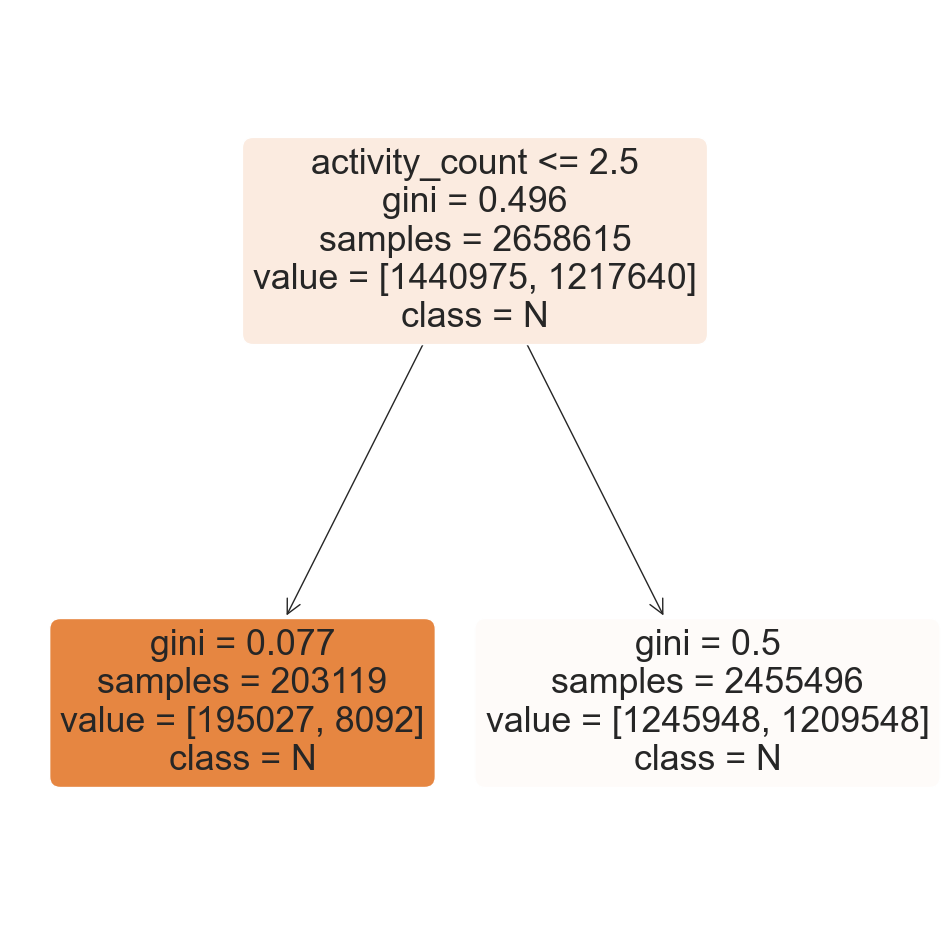

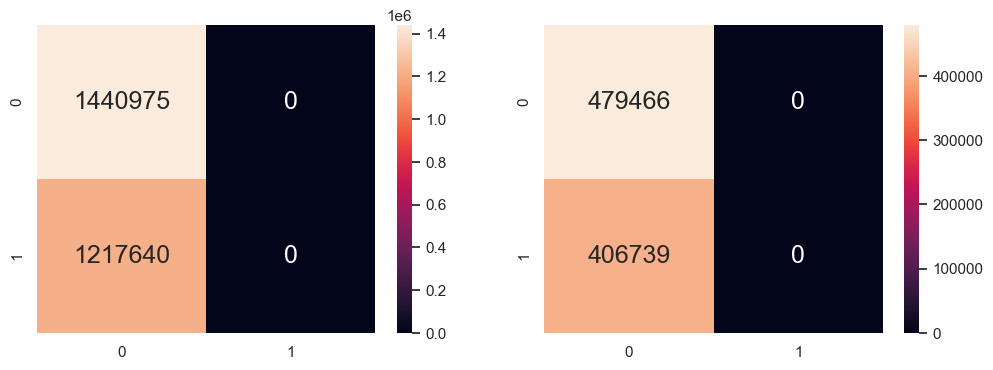

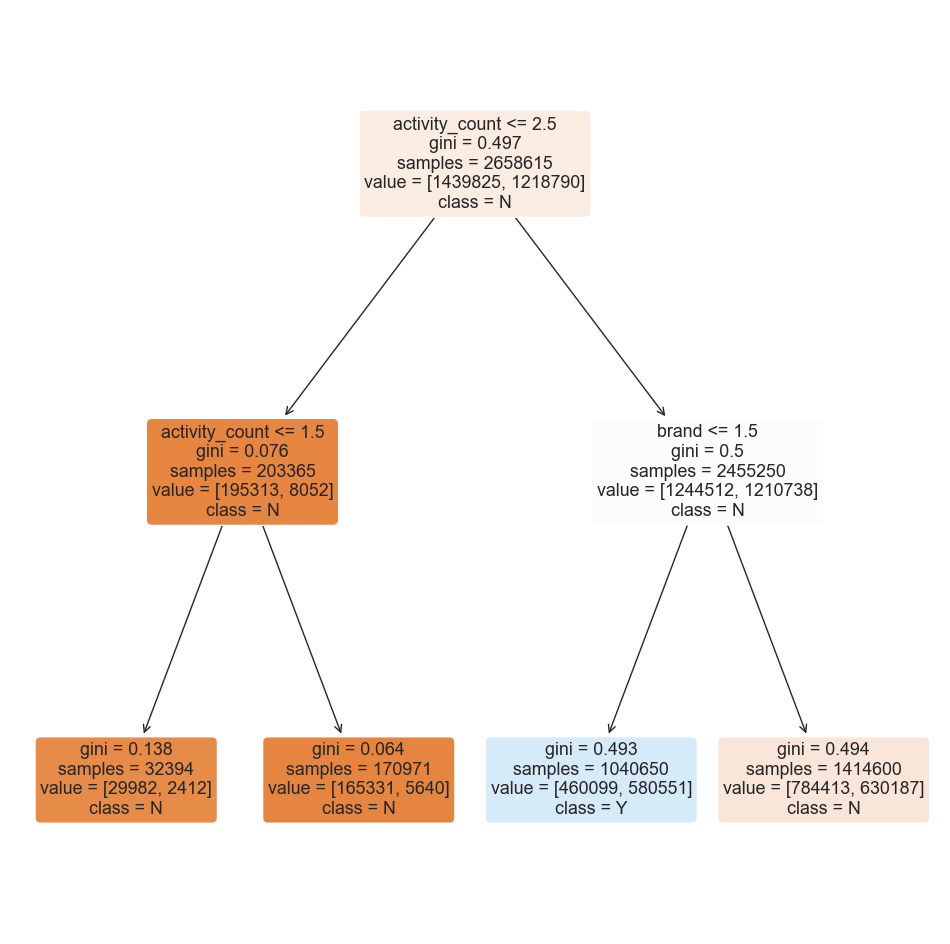

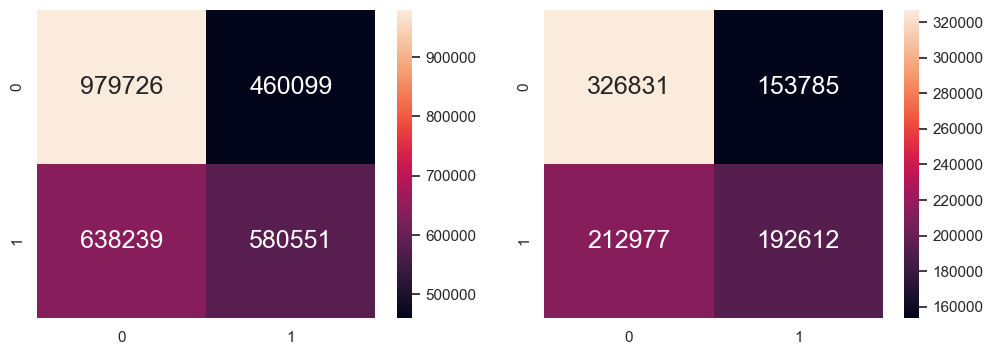

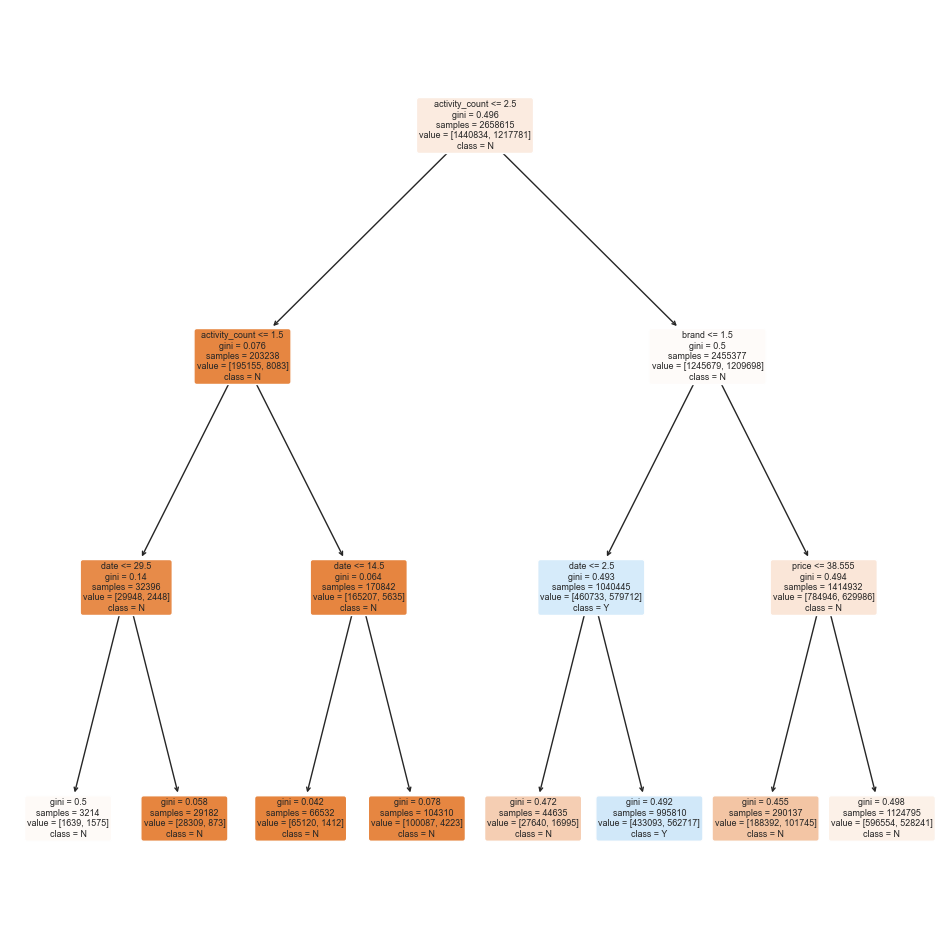

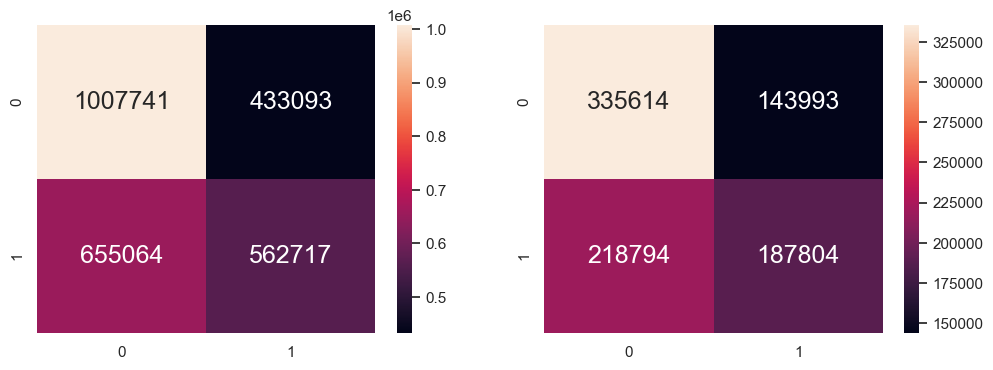

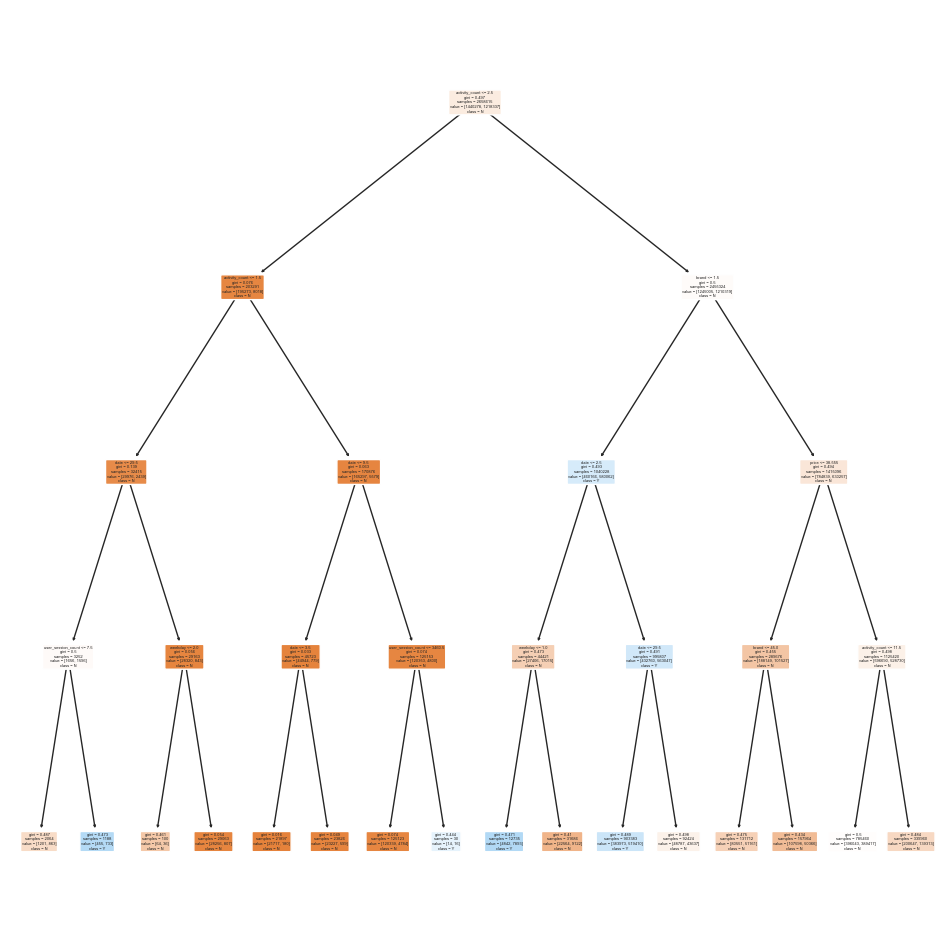

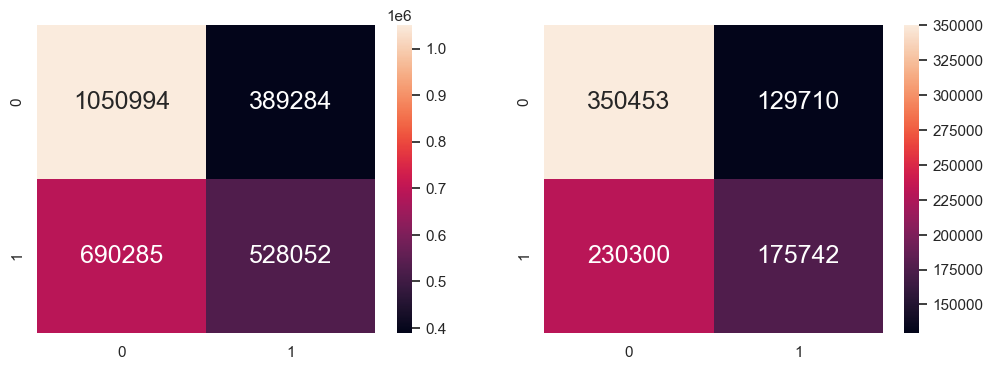

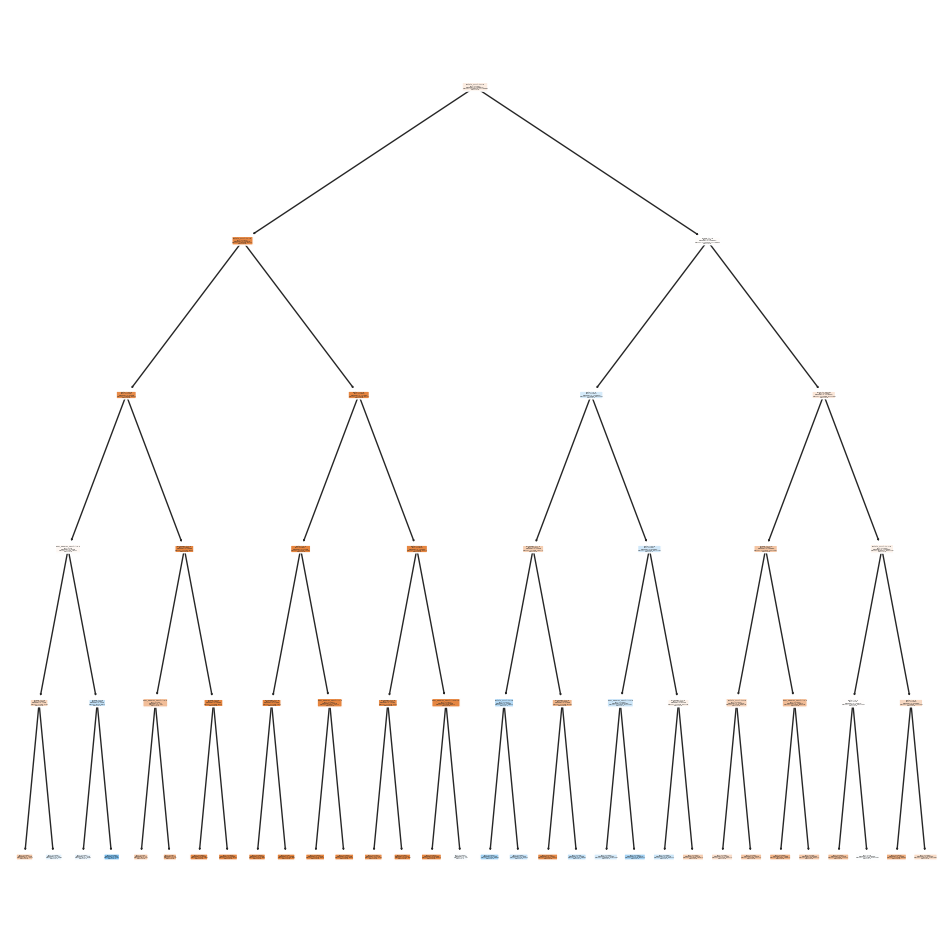

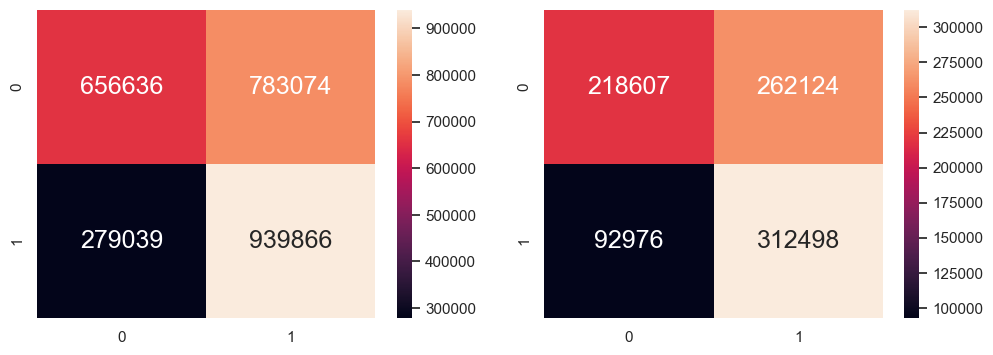

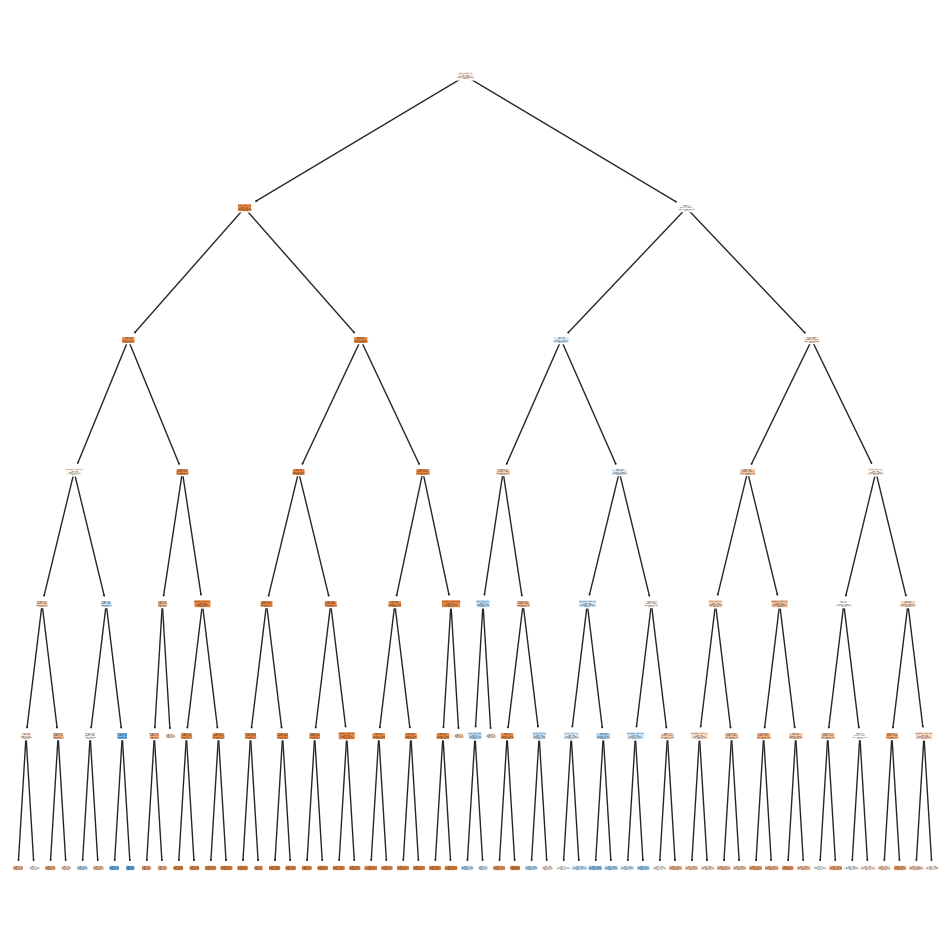

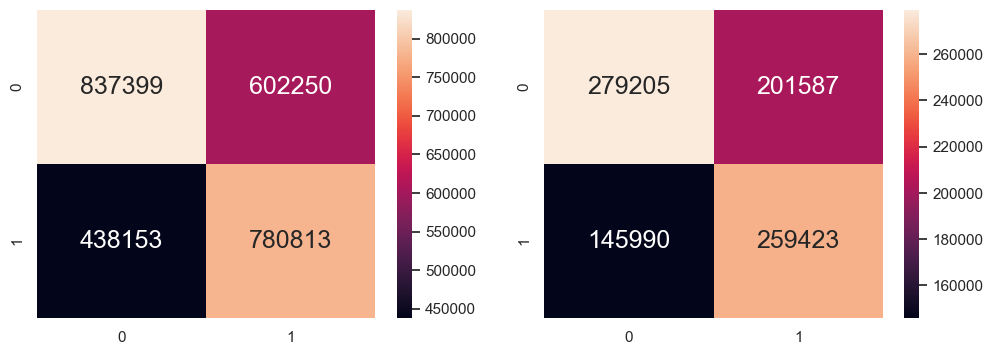

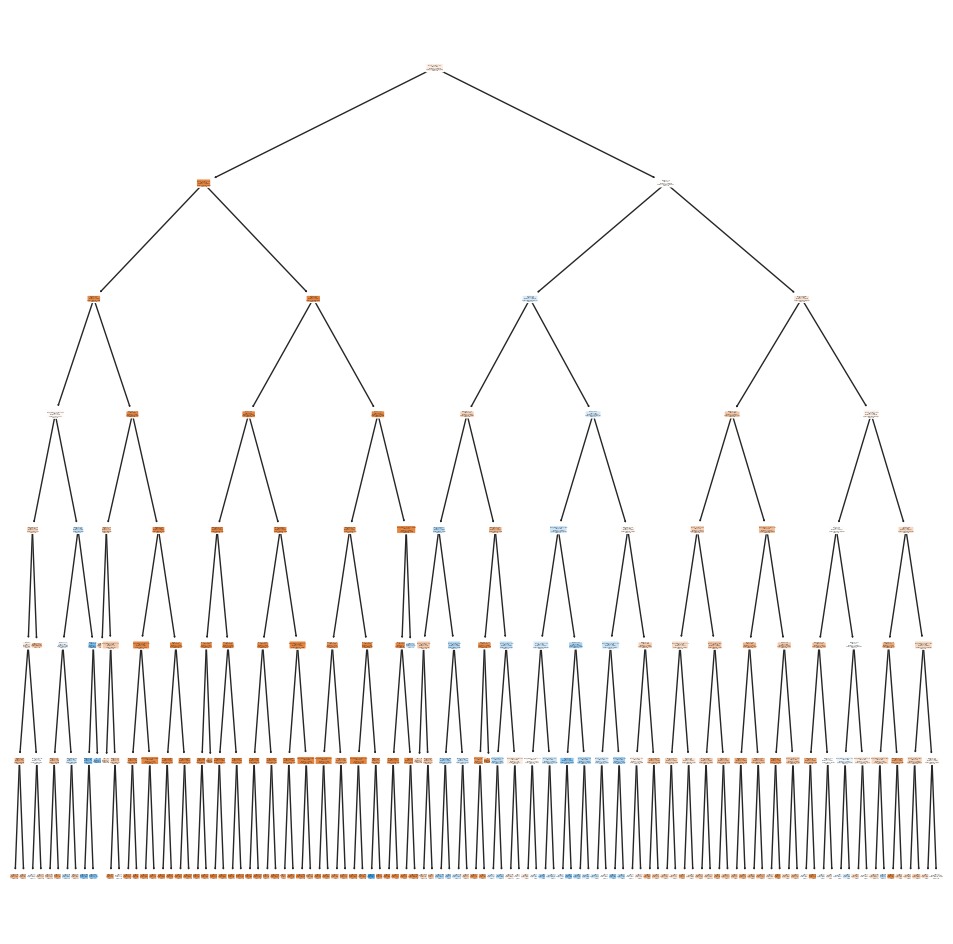

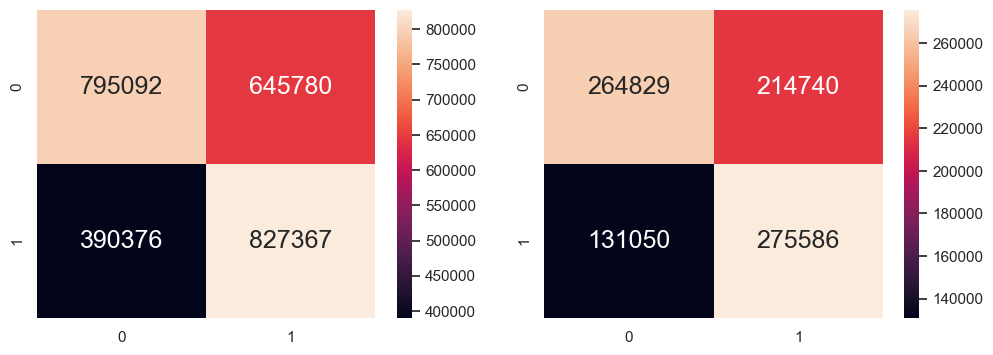

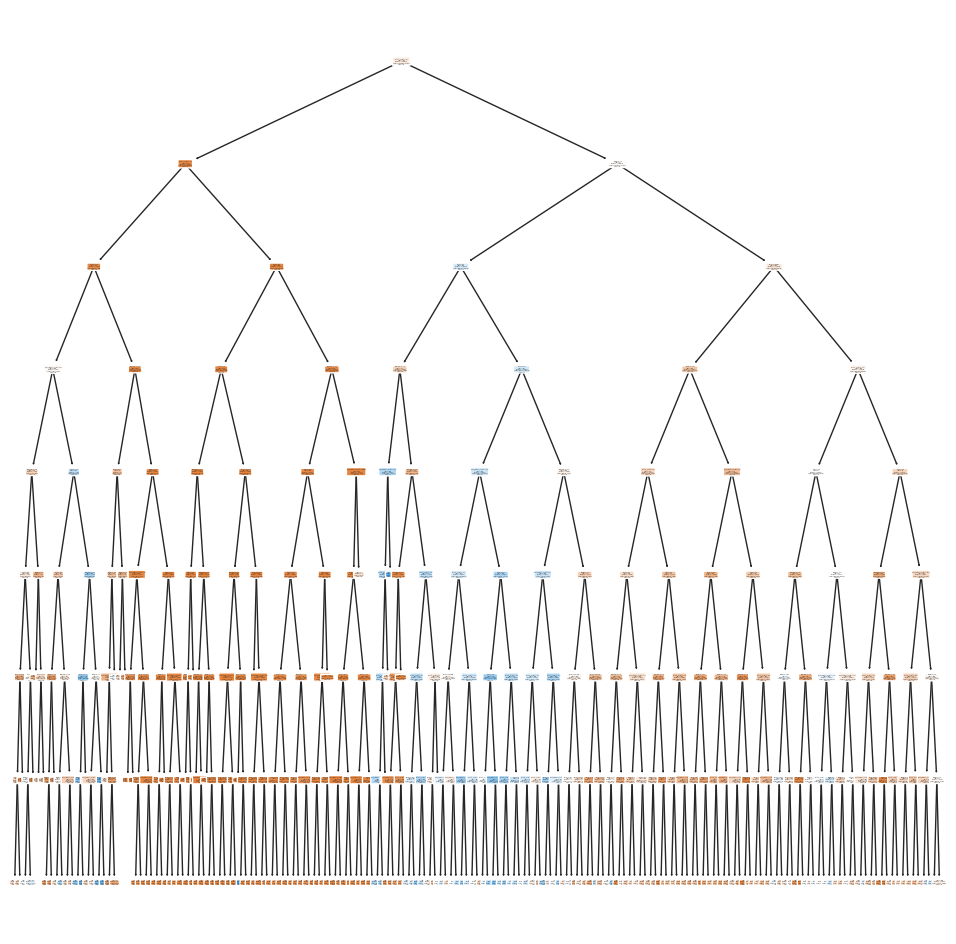

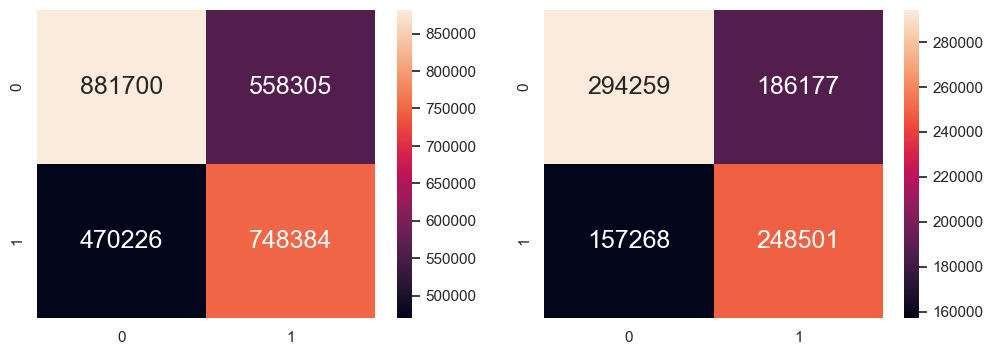

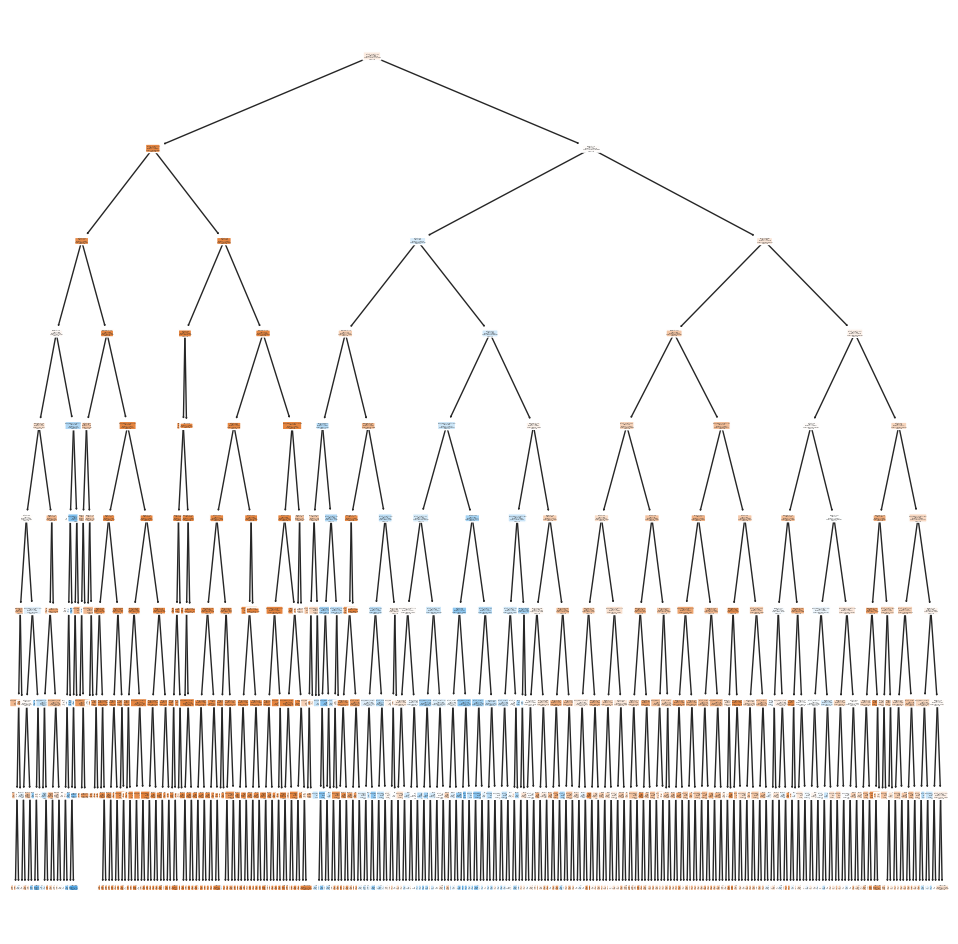

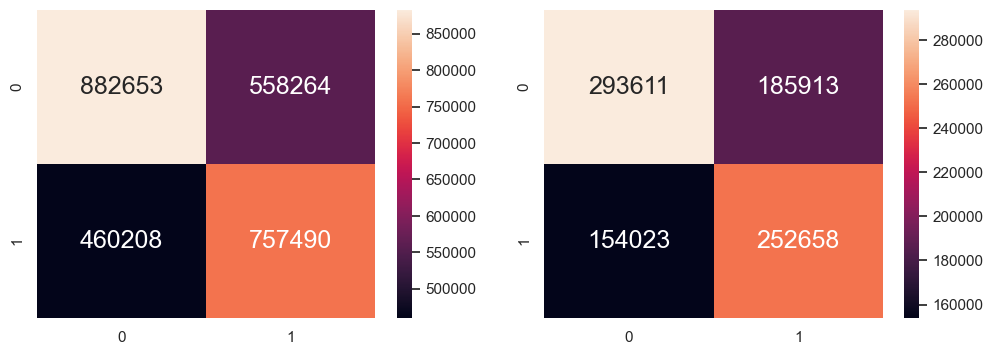

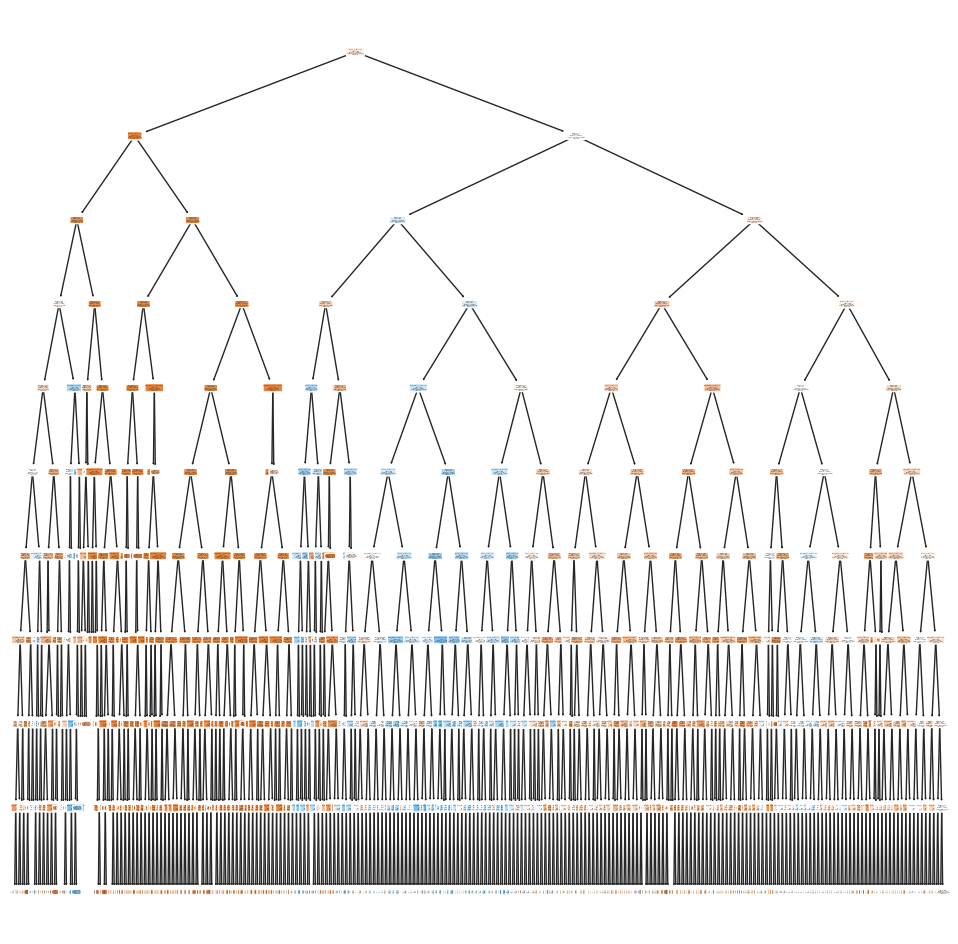

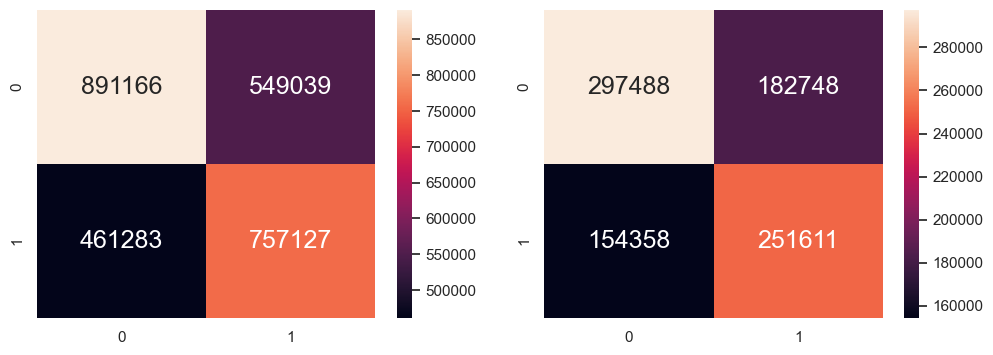

Error in callback <function flush_figures at 0x0000029881C4FCE0> (for post_execute):


KeyboardInterrupt: 

In [33]:
Accuracy = [] 
for depth in range (20):
    print(f"Decision tree of depth {depth+1}")
    dectree, acc = ClassificationTree (response, predictors,depth+1)
    Accuracy.append(acc)

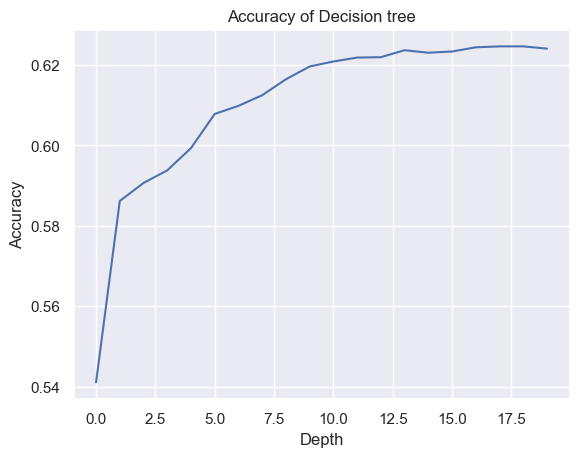

In [39]:
plt.plot(Accuracy)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision tree')
plt.show()

As we can see, while the overall test accuracy of the decision tree does increase with its depth, the rate of increase is too slow and decreasing.The accuracy seemingly reach a maximum of 62.46% at depth 18 and 19. Hence, a single decision tree, no matter the depth is not a good model, given its maximum accuracy to be only 62.46%.\
\
In order to improve the accuracy, we use a bagging method to consider the input from multiple decision tree. Hence we need to build a random forrest model.

In [4]:
#split dataset in features and target variable
predictor_cols = ['price', 'activity_count', 'user_session_count','weekday','date']
predictors = dataset[predictor_cols] # Features
response = dataset.event_type # Target variable

In [ ]:
dectree, acc = ClassificationTree (response, predictors,19)
print(acc)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6189892105475971

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.615568632539875

True Positive Rate:  0.6062242348916481
False Positive Rate:  0.37651961907937237
Overall accuracy:  0.615568632539875


0.615568632539875
